# Customer Churn Analysis

## Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 



### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',100)
print("Import complete")

Import complete


### Loading the dataset

In [2]:
df = pd.read_csv("Telecom_customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Exploratory Data Analysis

In [3]:
# checking shape of dataset
df.shape

(7043, 21)

In [4]:
# checking datatypes of the variables
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
# checking info about the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Dataset has 3 numerical variables and 18 categorical variables

In [6]:
# checking column names
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
# will be dropping 'customerID' as it is not relevany for prediction
df.drop(['customerID'],axis=1,inplace=True)
#since'TotalCharges' is a numeric column and is listed as categorical will be converting it to numeric
df.TotalCharges = df.TotalCharges.apply(pd.to_numeric,errors='coerce')

In [8]:
#checking missing values
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

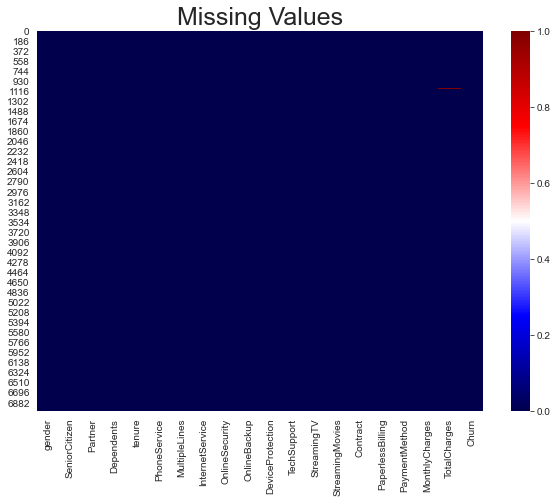

In [9]:
# visualising the missing values 
plt.figure(figsize=(10,7))
plt.title("Missing Values",fontsize=25)
sns.heatmap(df.isnull(),cmap='seismic')
plt.show()

From the above visualisations we can infer that there are some missing values in Total Charges feature

In [10]:
print("Number of unique values in features: ")
df.nunique()

Number of unique values in features: 


gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

- Analysing Target Variable Income

In [11]:
print(f"Target: 'Churn'\nUnique Values in Churn: {df.Churn.unique()}\nNumber of unique values: {df.Churn.nunique()}")

Target: 'Churn'
Unique Values in Churn: ['No' 'Yes']
Number of unique values: 2


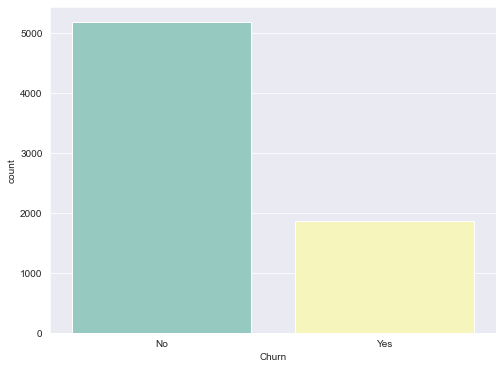

No     5174
Yes    1869
Name: Churn, dtype: int64


In [12]:
# visualising the distribution of target column
plt.figure(figsize=(8,6))
sns.countplot(x=df.Churn,palette='Set3')
plt.show()
print(df.Churn.value_counts())

In [13]:
# mapping the categories 0 and 1
df.Churn = df.Churn.map({"No":0,"Yes":1})
print(f"Target: 'Churn'\nUnique Values in Churn: {df.Churn.unique()}\nNumber of unique values: {df.Churn.nunique()}")

Target: 'Churn'
Unique Values in Churn: [0 1]
Number of unique values: 2


In [14]:
# analysing numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))
print(numerical_features)

Number of numerical variables:  5
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [15]:
# visualising numerical features
df[numerical_features].head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,0,1,29.85,29.85,0
1,0,34,56.95,1889.50,0
2,0,2,53.85,108.15,1
3,0,45,42.30,1840.75,0
4,0,2,70.70,151.65,1


In [16]:
for i in numerical_features:
    print(f"Total number of unique in {i} : {df[i].nunique()}")

Total number of unique in SeniorCitizen : 2
Total number of unique in tenure : 73
Total number of unique in MonthlyCharges : 1585
Total number of unique in TotalCharges : 6530
Total number of unique in Churn : 2


Here majorly the numerical variables are discrete in nature

In [17]:
# checking statistical summary od numerical variables
df[numerical_features].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441,0.265370
std,0.368612,24.559481,30.090047,2266.771362,0.441561
min,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.500000,401.450000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000
75%,0.000000,55.000000,89.850000,3794.737500,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


- From the above table we can see the statistical summary of the variables
- The standard deviations are quite small for all the numerical variables which means that the data is not widely spread, or can say there are not much variations in the data
- Mean and median are also close which implies that features not skewed much or can say that features are close to normal distribution
- Total charges has very high standard deviation which implies that the datapoints are widely spread 

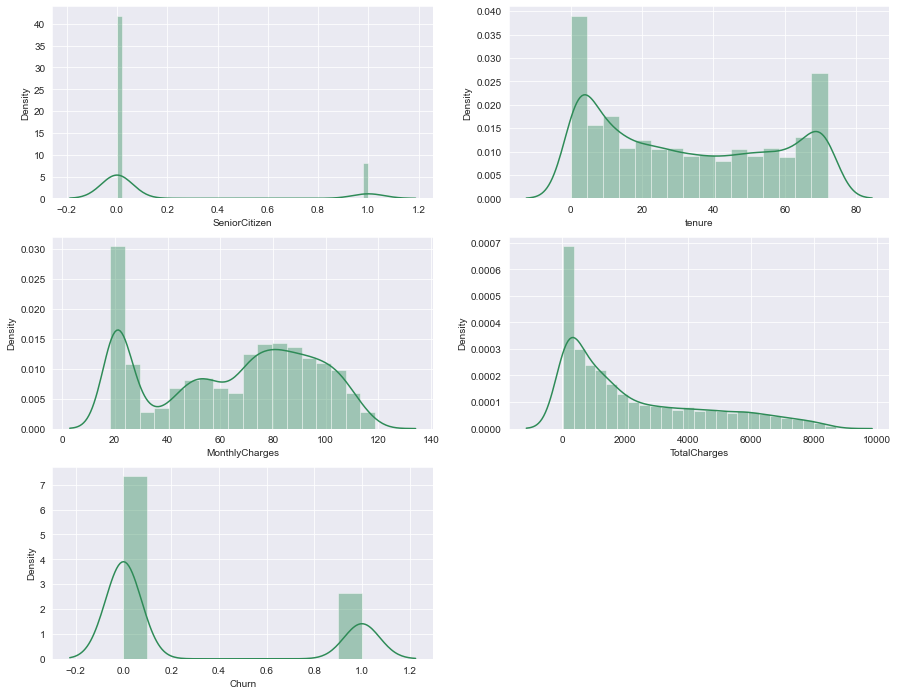

In [18]:
# analysing distribution of the numerical Features
plt.figure(figsize=(15,12))
plot = 1
for var in numerical_features:
    plt.subplot(3,2,plot)
    sns.distplot(df[var],color='seagreen')
    plot+=1
plt.show()

- From above plot we can see that tenure and Monthly charges are not normally distibuted 
- SeniorCitizen and Churn are bimodal in nature which shows that they are discrete variables

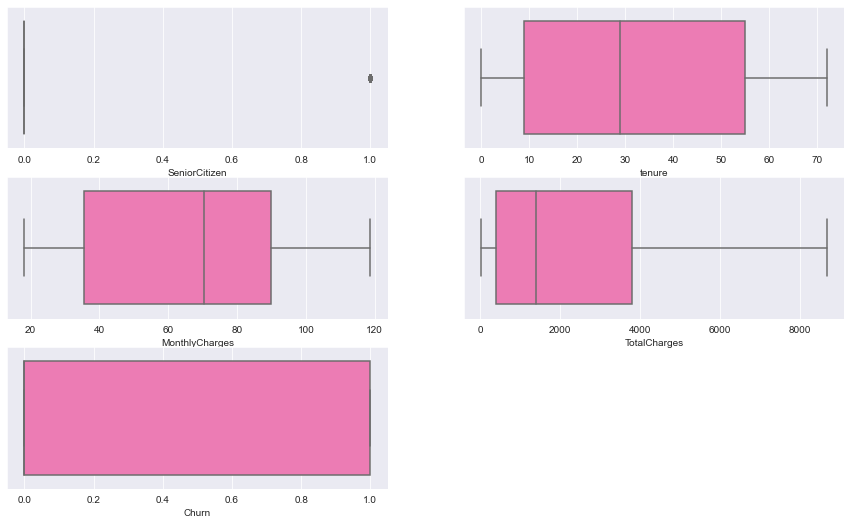

In [19]:
# analysing the spread of data using boxplots through which we can also visualise outliers
plt.figure(figsize=(15,12))
plot = 1
for var in numerical_features:
    plt.subplot(4,2,plot)
    sns.boxplot(x=df[var],color='hotpink')
    plot+=1
plt.show()

- From the above plots we ca analyse the Quartile ranges of the data
- Also there are no outliers in the dataset 

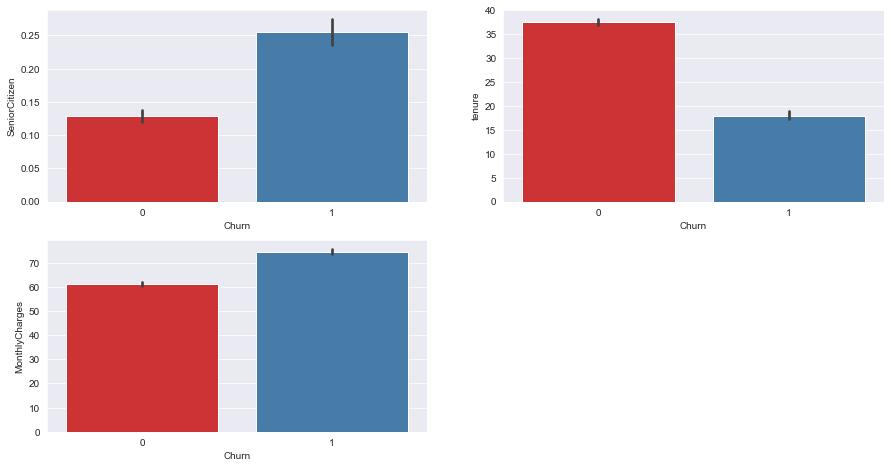

In [20]:
# analysing the variables with respect to Churn 
plt.figure(figsize=(15,12))
plot = 1
cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges']
for var in cols:
    plt.subplot(3,2,plot)
    sns.barplot(x=df.Churn,y=df[var],palette='Set1')
    plot+=1
plt.show()

- The above plots represent the relationship between churn and numerical features that are Senior citizen, tenure and monthly charge
- Majorly customers who churn are from age group of senior citizens, which implies senior citizens can stop the subscription
- Customer's with high tenure are more likely to churn away 
- Customer's who pay high monthly charges are more likely to continue the subscription people with low monthly charges churn away

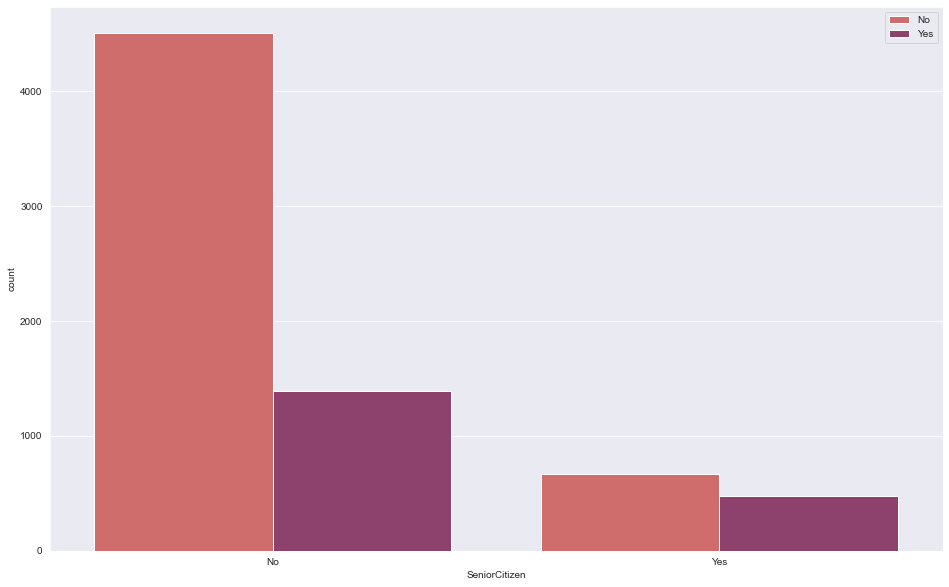

In [128]:
# Visualising the  SeniorCitizen feature with churn in more detail
plt.figure(figsize=(16,10))
sns.countplot(x='SeniorCitizen',hue='Churn',data=df,palette='flare')
plt.xticks([0,1],['No','Yes'])
plt.legend(labels=['No','Yes'],loc='upper right')
plt.show()

- Majorly non-senior citizens contribute more to the services
- Also rate of churning fro the services is quite low for senior citizens than the non-citizen group

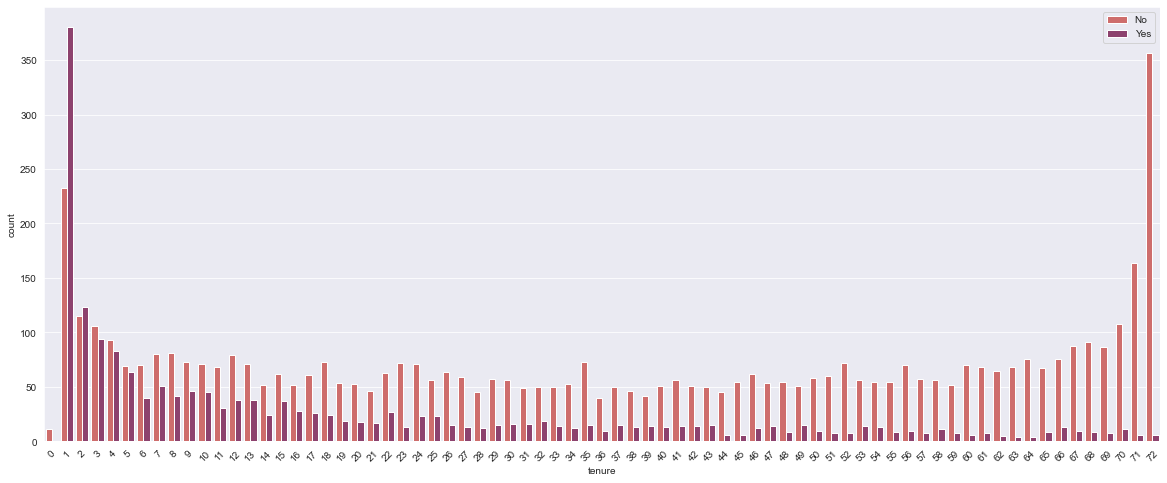

In [130]:
# Visualising the tenure feature with churn in more detail
plt.figure(figsize=(20,8))
sns.countplot(x='tenure',hue='Churn',data=df,palette='flare')
plt.xticks(rotation=45)
plt.legend(labels=['No','Yes'],loc='upper right')
plt.show()

- People who are high in number are either with very less tenurity specifically below 5 or very high tenurity mostly tenurity above 67
- Also people who churn away more have less tenurity highest is for tenurity 1

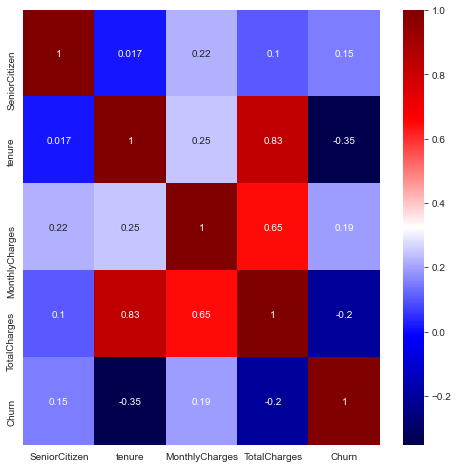

In [23]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,cmap='seismic')
plt.show()

- From above we can see the correlation between the variables
- Can see higher collinearity between independent variables

In [24]:
# analysing categorical variables
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O' ] 
print('Number of numerical variables: ', len(categorical_features))
print(categorical_features)

Number of numerical variables:  15
['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [25]:
# visualising categorical features
df[categorical_features].head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [26]:
# checking number of categories
for var in categorical_features:
    print("{} has {} categories".format(var,len(df[var].unique())))

gender has 2 categories
Partner has 2 categories
Dependents has 2 categories
PhoneService has 2 categories
MultipleLines has 3 categories
InternetService has 3 categories
OnlineSecurity has 3 categories
OnlineBackup has 3 categories
DeviceProtection has 3 categories
TechSupport has 3 categories
StreamingTV has 3 categories
StreamingMovies has 3 categories
Contract has 3 categories
PaperlessBilling has 2 categories
PaymentMethod has 4 categories


In [27]:
# checking statistical summary od numerical variables
df[categorical_features].describe()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365


In [28]:
#checking unique values in type feature
for i in categorical_features:
    print("Unique values in {} are \n{}".format(i,df[i].value_counts()))
    print("-"*30)

Unique values in gender are 
Male      3555
Female    3488
Name: gender, dtype: int64
------------------------------
Unique values in Partner are 
No     3641
Yes    3402
Name: Partner, dtype: int64
------------------------------
Unique values in Dependents are 
No     4933
Yes    2110
Name: Dependents, dtype: int64
------------------------------
Unique values in PhoneService are 
Yes    6361
No      682
Name: PhoneService, dtype: int64
------------------------------
Unique values in MultipleLines are 
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
------------------------------
Unique values in InternetService are 
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
------------------------------
Unique values in OnlineSecurity are 
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
------------------------------


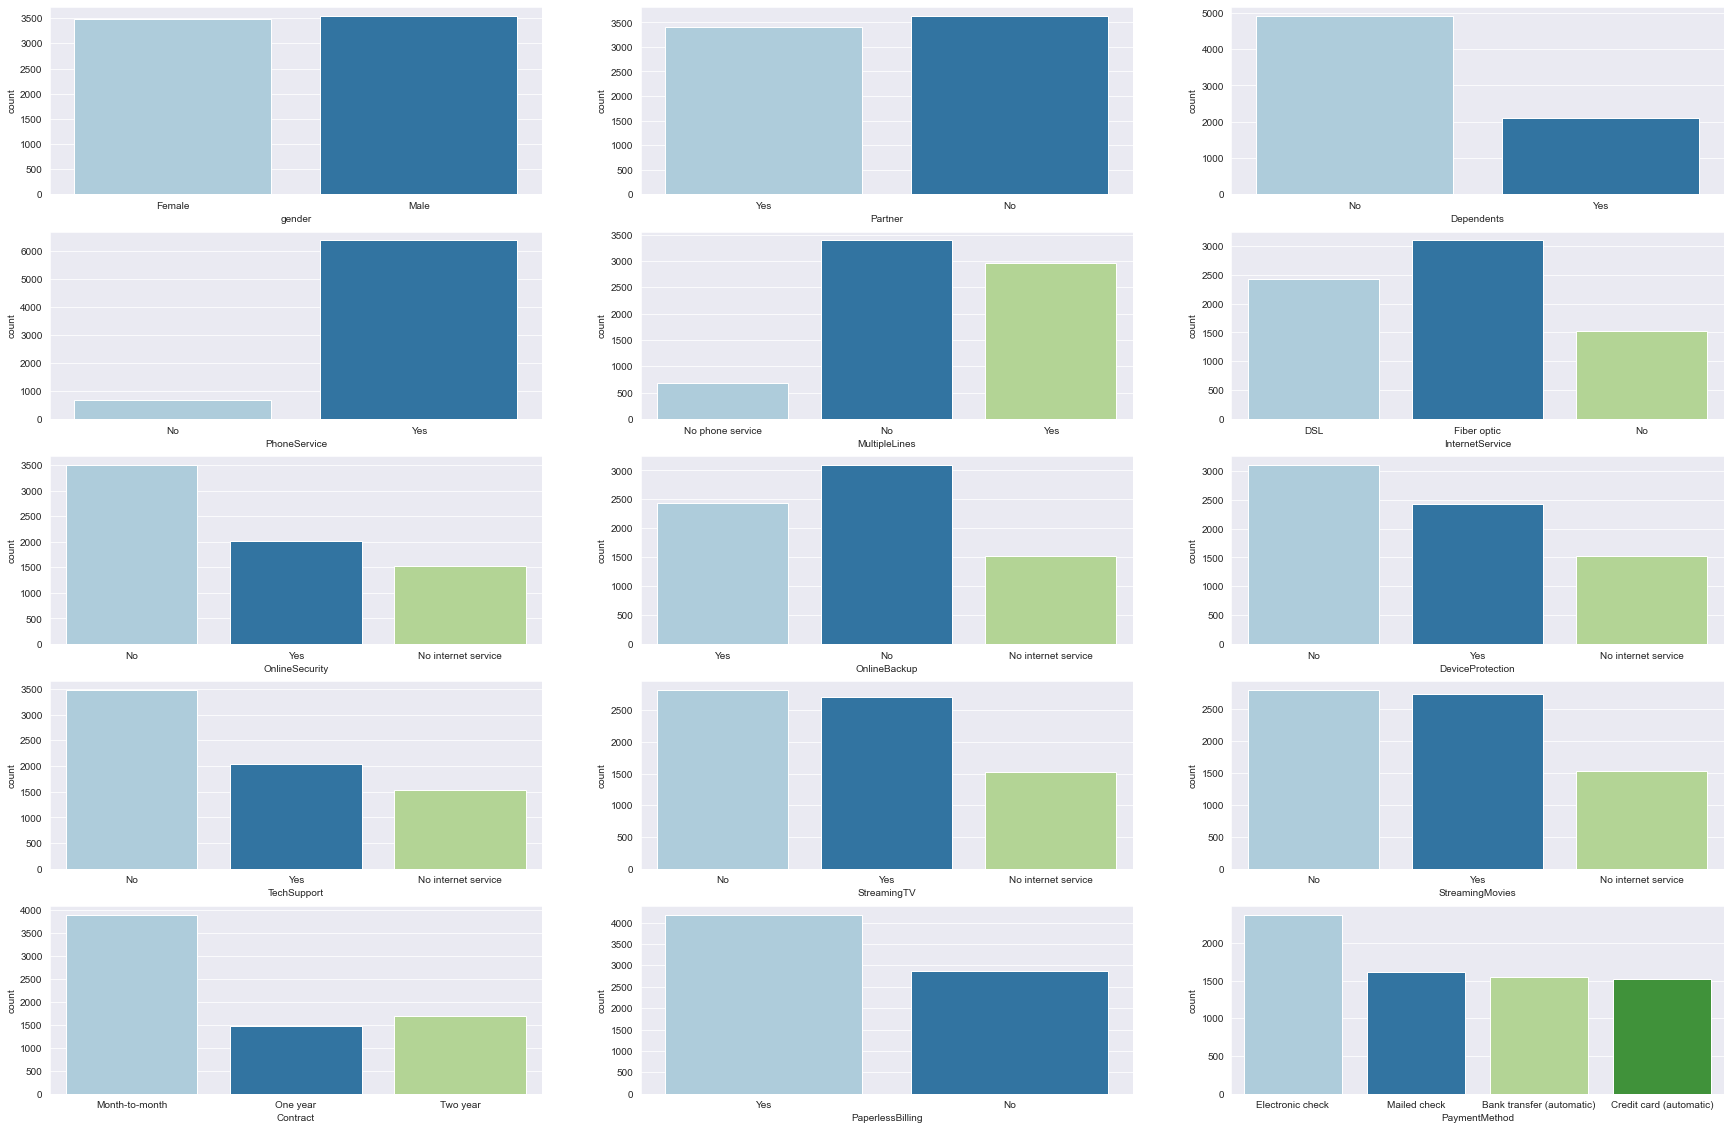

In [29]:
plt.figure(figsize=(30,20))
plot = 1
for var in categorical_features:
    plt.subplot(5,3,plot)
    sns.countplot(x=df[var],palette='Paired')
    plot+=1
    
plt.show()

- Male and females are equally contributing to the services.
- Mostly people with no partner are associated with the services than people with partner.
- Majorly customers with no dependents contribute more to the services.
- Majorly customers contributing to services are having phone services rather than customers no phone service which is very less.
- Majorly customers with subscription are not having multiple lines followed by some of them having multiple lines with customers with no phone services being the least.
- Most of the service holders have fiber optic internet service followed by DSL internet service with no internet service being the least.
- Moslty customers do not have any type of Online security.
- Majorly customers do not have any backup plan
- Mostly people are not having any type of device protection.
- Majortiy of users do not take any kind of technical support on the services
- Customers with no streamingTV and streaming movies subscription are slightly higher in number than those who have. 
- Mostly customers choose month to month plan followed by two year and one year
- Customers most likely to choose for paperless billing option
- Majority of the customers pay by electronic chek followed by mailed checks and people with bank transfer, and credit card payment option being the least

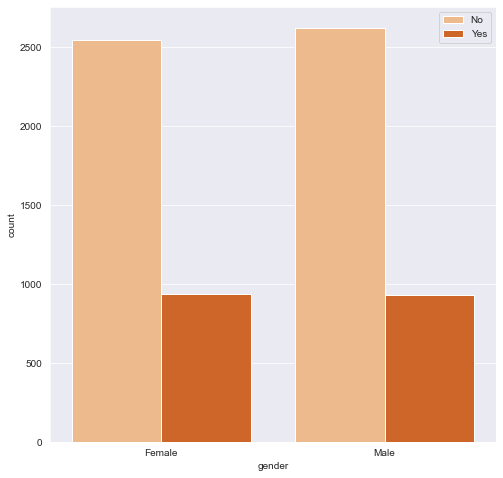

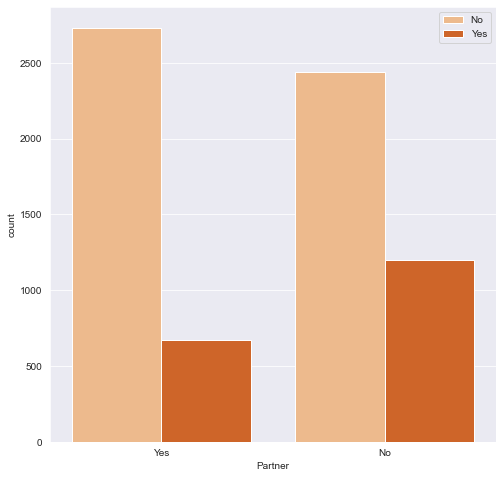

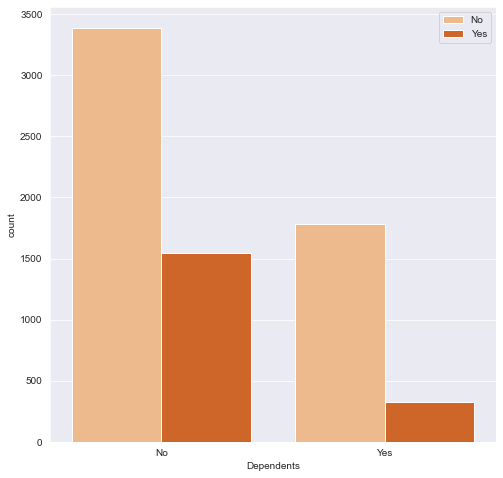

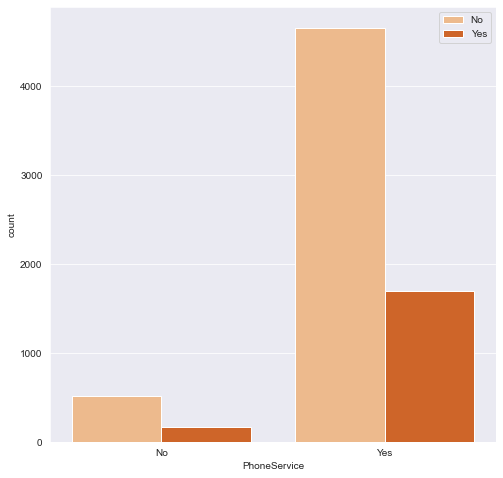

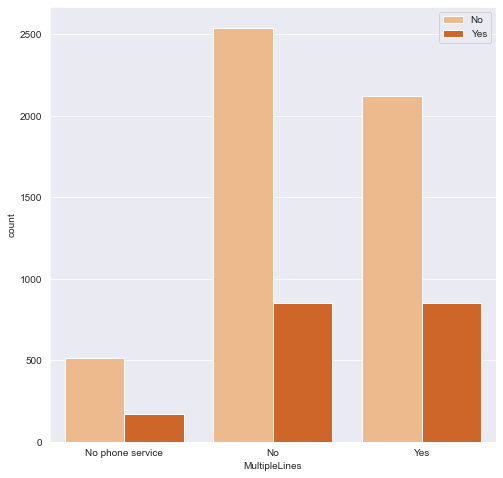

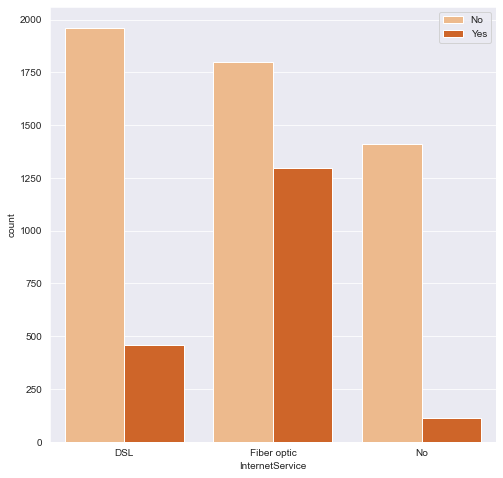

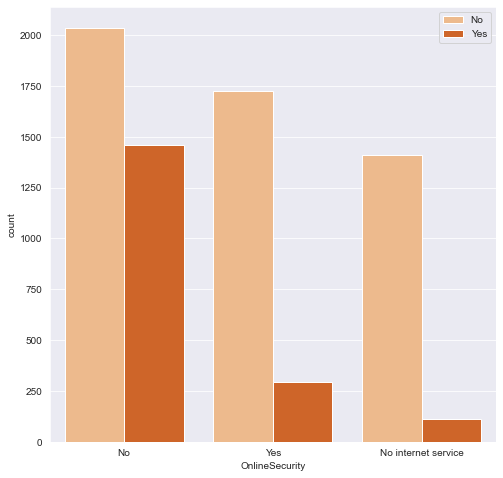

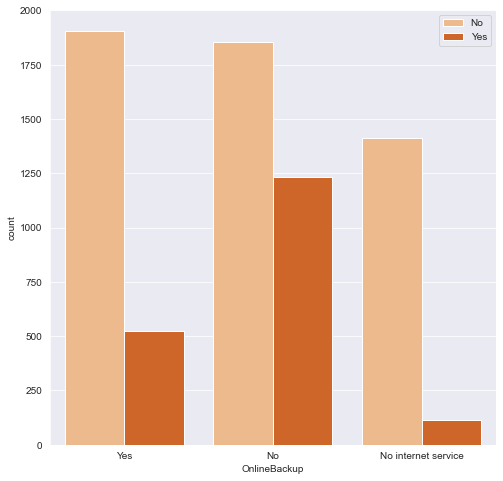

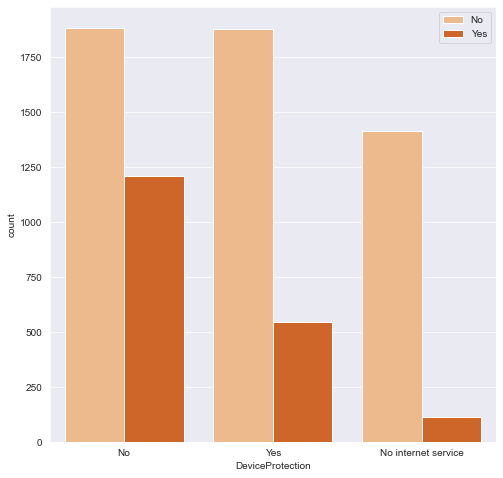

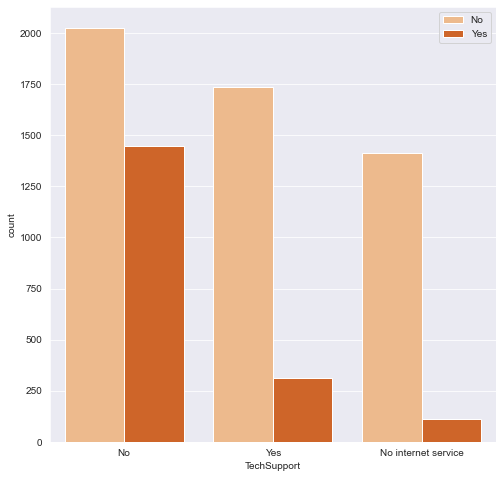

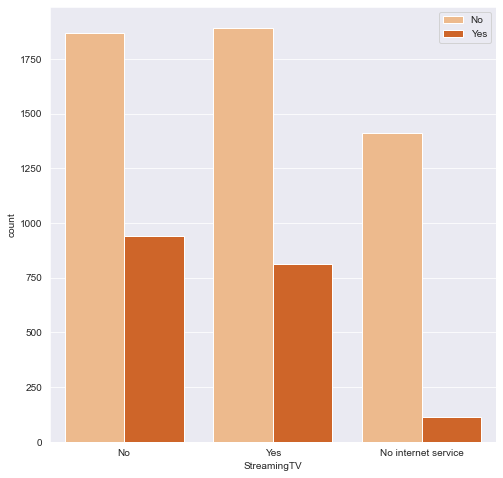

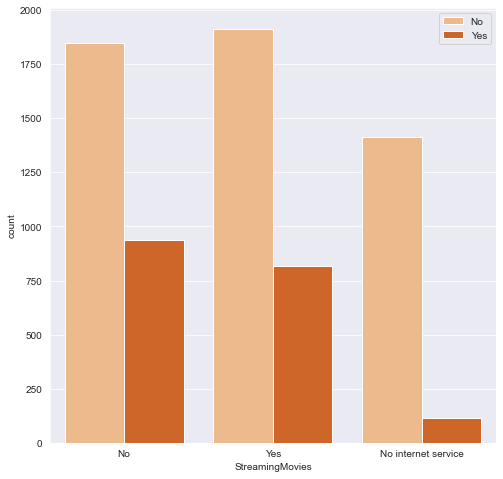

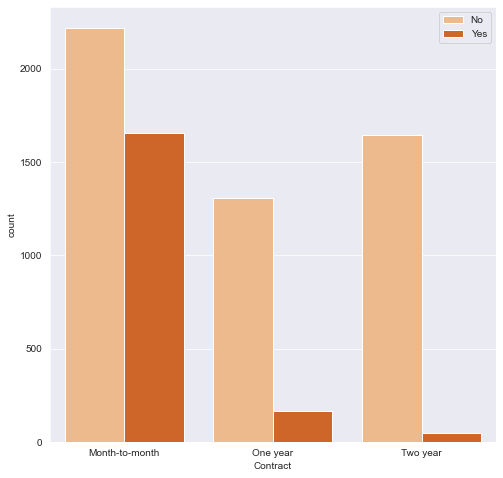

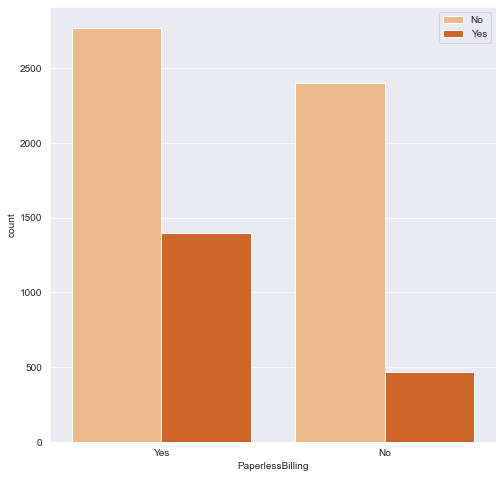

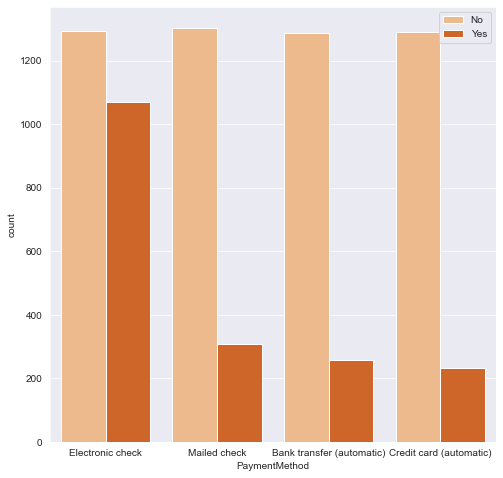

In [30]:
for var in categorical_features:
    plt.figure(figsize=(8,8))
    sns.countplot(x=df[var],hue=df.Churn,palette='Oranges')
    plt.legend(labels=['No','Yes'],loc='upper right')
    plt.show()

- There is no specific churn rate for genders both have same rate of churn
- Customers with no partner have high churning rate than a customer with partner
- Customers who have Phone services have high churn rate than those who don't
- Customers with dependents have less churn rate than the other group
- There is no specific churn rate for customers with mutliple lines or no multiple lines have same rate of churn
- Customers who have DSL connection have less churn rate 
- Customers who have online security have less churn rate 
- People who have online backups are having less churn rate than who do not
- People who have device protection are having less churn rate
- Customers who take technical support service have less churn rate than who do not
- Customers who have streamingTV and streamingmovies have less churn rate than customers who do not have
- People who take month-to-month plan churn most followed by one-year plan and customers with 2 year plan have very less churning rate
- Customers who do not get paperless billing have less churn rate 
- Customers who pay using Electronic check have highest churn rate with other options being very less and credit card being the least

### Feature Engineering

#### Handling Missing values

In [31]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [32]:
# analysing missing values in Total Charges with all features
df[np.isnan(df.TotalCharges)]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,0
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,0
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,0
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,0
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,0
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,0
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,0
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,0
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,0
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,0


In [45]:
# since the tenure for these nan values are 0 and majorly are with no internet service so can drop
# them as they are less in number as well since there are only 11 rows and deleting 
# them will not affect the data

df2 =df.dropna(axis=0)
df2.shape

(7032, 20)

#### Treating Skewness

In [46]:
df2[numerical_features].skew()

SeniorCitizen     1.831103
tenure            0.237731
MonthlyCharges   -0.222103
TotalCharges      0.961642
Churn             1.060622
dtype: float64

In [47]:
# Since SeniorCitizen and churn are discrete values will not apply trasnformation on them 
# Total charges is skewed little bit so will try to apply log transformation
df2.TotalCharges = np.log(df2.TotalCharges)

In [48]:
df2[numerical_features].skew()

SeniorCitizen     1.831103
tenure            0.237731
MonthlyCharges   -0.222103
TotalCharges     -0.753574
Churn             1.060622
dtype: float64

#### Encoding categorical variable

In [49]:
df2[categorical_features]

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check
7039,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic)
7040,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check
7041,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check


In [50]:
# mapping variables having binary categories with 0 and 1 

df2.gender = df2.gender.map({'Female':0,'Male':1})
df2.Partner = df2.Partner.map({'No':0,'Yes':1})
df2.Dependents = df2.Dependents.map({'No':0,'Yes':1})
df2.PhoneService = df2.PhoneService.map({'No':0,'Yes':1})
df2.PaperlessBilling = df2.PaperlessBilling.map({'No':0,'Yes':1})


# creating dummy variables for category more than 2
colist = ['MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
         'DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
         'Contract','PaymentMethod']
dummies = pd.get_dummies(df2[colist],drop_first=True)
dummies

,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,0,0,1
7039,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,0,0
7040,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7041,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [51]:
df3 = df2.drop(['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                'Contract','PaymentMethod'],axis=1)
df3

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,29.85,3.396185,0
1,1,0,0,0,34,1,0,56.95,7.544068,0
2,1,0,0,0,2,1,1,53.85,4.683519,1
3,1,0,0,0,45,0,0,42.30,7.517928,0
4,0,0,0,0,2,1,1,70.70,5.021575,1
...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84.80,7.596141,0
7039,0,0,1,1,72,1,1,103.20,8.904209,0
7040,0,0,1,1,11,0,1,29.60,5.847739,0
7041,1,1,1,0,4,1,1,74.40,5.725544,1


In [52]:
df4 = pd.concat([df3,dummies],axis=1)
df4

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,3.396185,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,7.544068,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,1,53.85,4.683519,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,7.517928,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,1,70.70,5.021575,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84.80,7.596141,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,0,0,1
7039,0,0,1,1,72,1,1,103.20,8.904209,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,0,0
7040,0,0,1,1,11,0,1,29.60,5.847739,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,74.40,5.725544,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


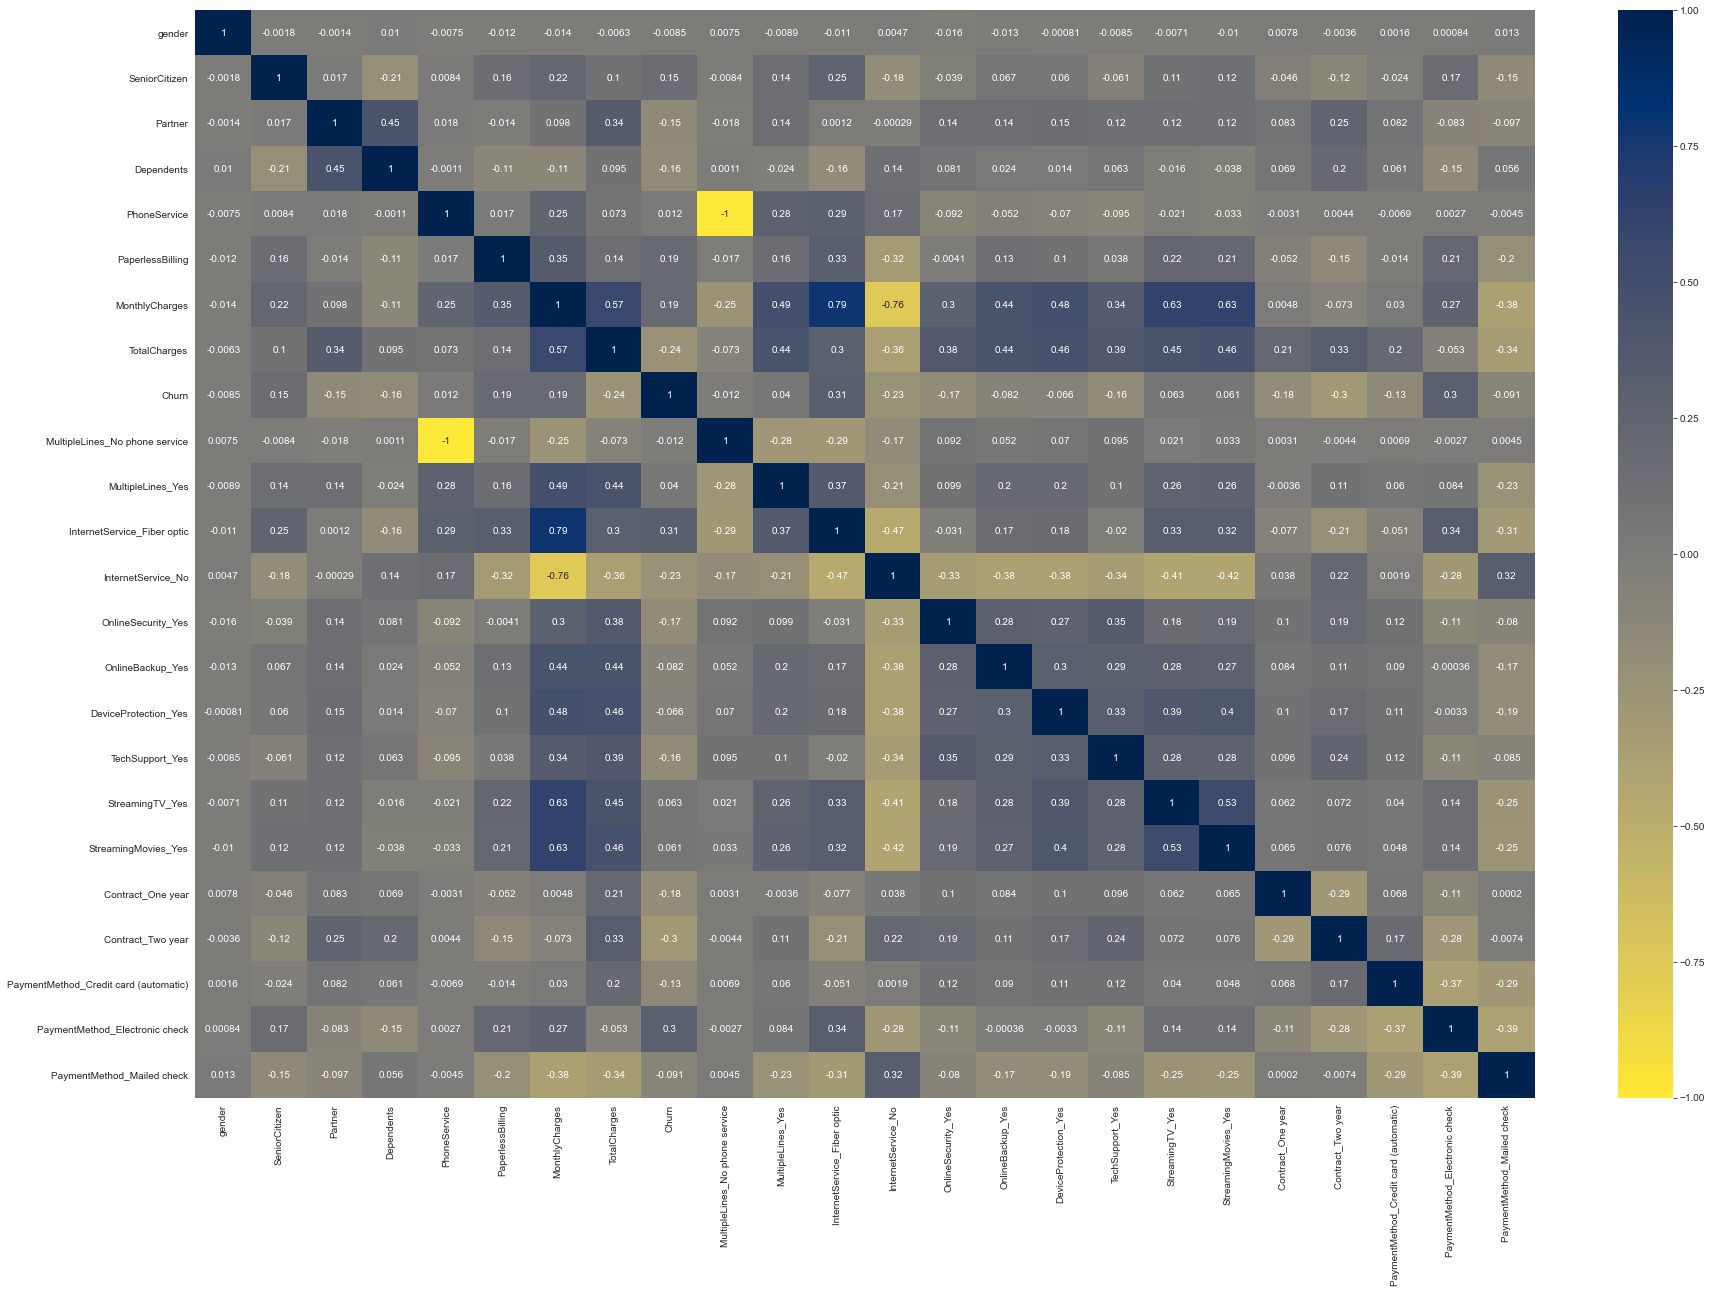

In [56]:
# checking corelation 
plt.figure(figsize=(30,20))
sns.heatmap(df4.corr(),annot=True,cmap='cividis_r')
plt.show()

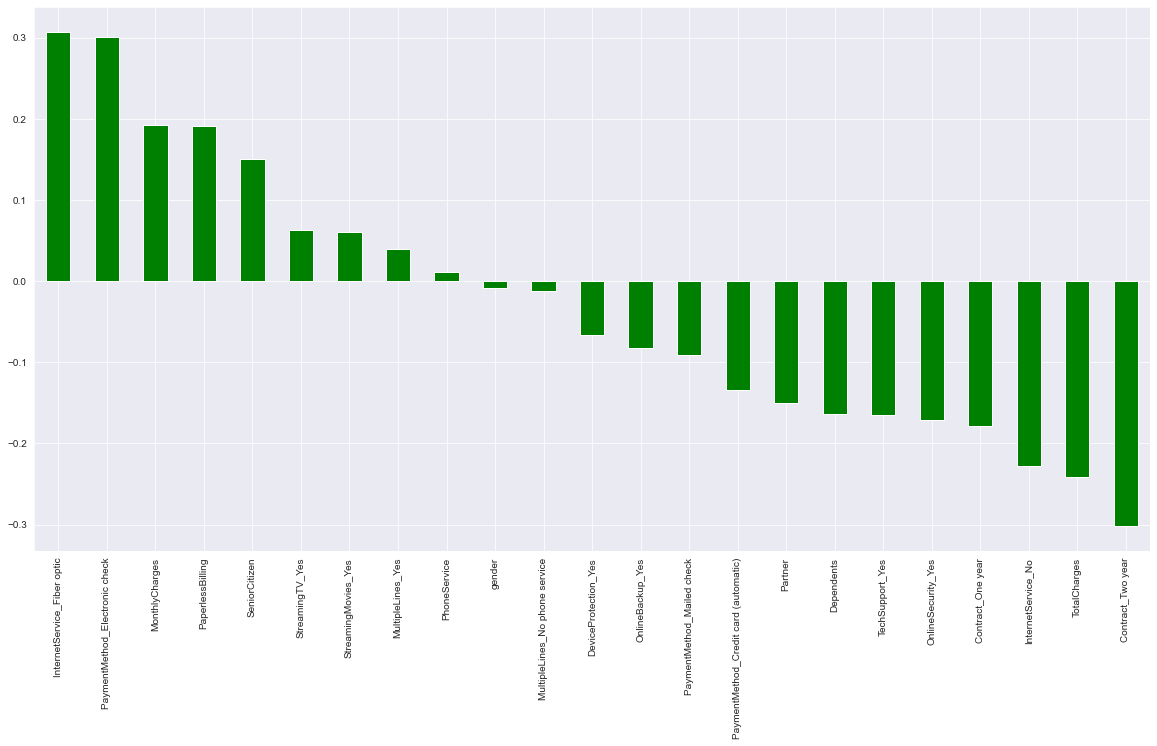

In [118]:
# checking correlation with respect to target variable
plt.figure(figsize=(20,10))
df4.corr().Churn.sort_values(ascending=False).drop('Churn').plot.bar(color='g')
plt.show()

From above plots we can see some of the independent variables are highly correlated. 
So will be removing the variables with weakest strength with target variable

In [55]:
# dropping to resolve multicollinearity
df4.drop(['OnlineSecurity_No internet service','StreamingMovies_No internet service',
          'OnlineBackup_No internet service','StreamingTV_No internet service',
          'TechSupport_No internet service','DeviceProtection_No internet service',
          'tenure'],axis=1,inplace=True)

In [57]:
## splitting into dependent and independent variables
X = df4.drop(['Churn'],axis=1)
y = df4.Churn

#### Scaling

In [58]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(X)
x = pd.DataFrame(x_scaled, columns=X.columns)
x.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.0,1.0,0.0,0.0,1.0,0.115423,0.075353,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.385075,0.751403,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0,1.0,0.354229,0.285172,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.239303,0.747142,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.521891,0.340270,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [59]:
# performing train test split
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.30, random_state = 1)

### Feature Selection

In [60]:
from sklearn.feature_selection import mutual_info_regression

mutual_info = mutual_info_regression(xtrain,ytrain)
mutual_info

array([0.        , 0.        , 0.00234889, 0.01525257, 0.00422254,
       0.02190449, 0.05197439, 0.04339299, 0.01212196, 0.00421231,
       0.05164705, 0.03462557, 0.00629658, 0.00412265, 0.00075118,
       0.0284675 , 0.00694682, 0.00696852, 0.00214025, 0.0557771 ,
       0.02494251, 0.03742767, 0.        ])

In [61]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = xtrain.columns
mutual_info.sort_values(ascending=False)

Contract_Two year                        0.055777
MonthlyCharges                           0.051974
InternetService_Fiber optic              0.051647
TotalCharges                             0.043393
PaymentMethod_Electronic check           0.037428
InternetService_No                       0.034626
TechSupport_Yes                          0.028468
PaymentMethod_Credit card (automatic)    0.024943
PaperlessBilling                         0.021904
Dependents                               0.015253
MultipleLines_No phone service           0.012122
StreamingMovies_Yes                      0.006969
StreamingTV_Yes                          0.006947
OnlineSecurity_Yes                       0.006297
PhoneService                             0.004223
MultipleLines_Yes                        0.004212
OnlineBackup_Yes                         0.004123
Partner                                  0.002349
Contract_One year                        0.002140
DeviceProtection_Yes                     0.000751


<AxesSubplot:>

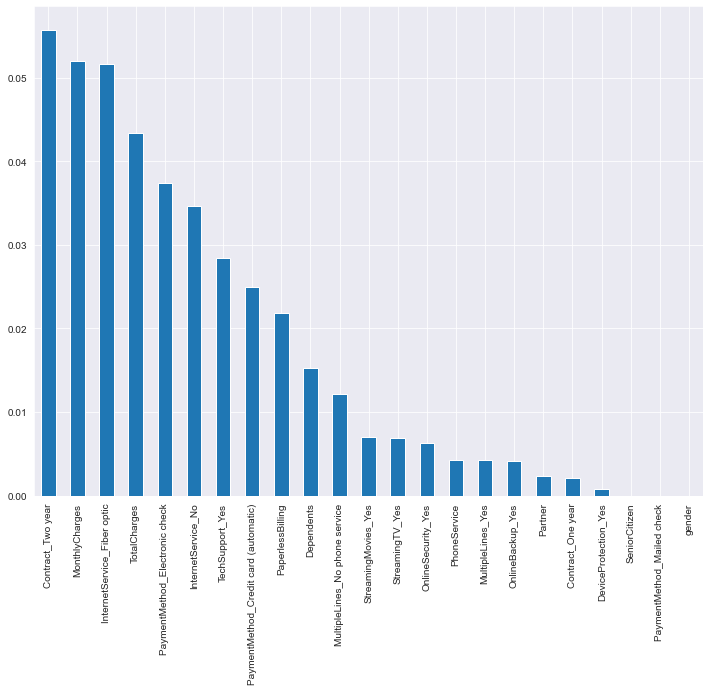

In [62]:
mutual_info.sort_values(ascending=False).plot(kind='bar',figsize=(12,9))

In [104]:
from sklearn.feature_selection import SelectPercentile

#selecting top 80 percentile
selected_cols = SelectPercentile(mutual_info_regression,80)
selected_cols.fit(xtrain,ytrain)

SelectPercentile(percentile=80,
                 score_func=<function mutual_info_regression at 0x122f78f70>)

In [105]:
selected_cols.get_support()

array([ True, False,  True, False,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False])

In [106]:
xtrain.columns[selected_cols.get_support()]

Index(['gender', 'Partner', 'PhoneService', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check'],
      dtype='object')

In [107]:
x_train = selected_cols.transform(xtrain)
x_test = selected_cols.transform(xtest)

### Model Buliding 

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,plot_roc_curve,roc_curve,auc,roc_auc_score,precision_score,recall_score,f1_score

In [68]:
# creating instances for models
LR = LogisticRegression()
KNN = KNeighborsClassifier()
SV = SVC()
DTC = DecisionTreeClassifier()
NB = MultinomialNB()
RTF = RandomForestClassifier()
ADB = AdaBoostClassifier()
GB = GradientBoostingClassifier()

In [69]:
# creating list of model names and instances
models = [("Logistic Regression ",LR),
          ("K Nearest Neighbor classifier ",KNN),
          ("Support Vector classifier ",SV),
          ("Decision Tree classifier ",DTC),
          ("Random forest classifier ",RTF),
          ("AdaBoost classifier",ADB),
          ("Gradient Boosting classifier ",GB),
          ("Naive Bayes classifier",NB)]

##### Training the models 

In [108]:
for name,model in models:
    model.fit(x_train,ytrain)
    print(name," trained")

Logistic Regression   trained
K Nearest Neighbor classifier   trained
Support Vector classifier   trained
Decision Tree classifier   trained
Random forest classifier   trained
AdaBoost classifier  trained
Gradient Boosting classifier   trained
Naive Bayes classifier  trained


##### Evaluating the models

In [109]:
train_scores=[]
test_scores=[]
Model = []
for name,model in models:
    print("******",name,"******")
    train_acc = accuracy_score(ytrain,model.predict(x_train))
    test_acc = accuracy_score(ytest,model.predict(x_test))
    print('Train score : ',train_acc)
    print('Test score : ',test_acc)
    train_scores.append(train_acc)
    test_scores.append(test_acc)
    Model.append(name)

****** Logistic Regression  ******
Train score :  0.8084112149532711
Test score :  0.8009478672985783
****** K Nearest Neighbor classifier  ******
Train score :  0.8413246647704186
Test score :  0.7668246445497631
****** Support Vector classifier  ******
Train score :  0.8242584315318976
Test score :  0.7971563981042654
****** Decision Tree classifier  ******
Train score :  0.9973587972368956
Test score :  0.7255924170616114
****** Random forest classifier  ******
Train score :  0.9973587972368956
Test score :  0.781042654028436
****** AdaBoost classifier ******
Train score :  0.814303128809427
Test score :  0.7943127962085308
****** Gradient Boosting classifier  ******
Train score :  0.829134498171475
Test score :  0.8004739336492891
****** Naive Bayes classifier ******
Train score :  0.7805770012190166
Test score :  0.7838862559241706


****** Logistic Regression  ******

 ROC_AUC_SCORE :  0.709683960487819
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1555
           1       0.65      0.52      0.58       555

    accuracy                           0.80      2110
   macro avg       0.75      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110

Precision:  0.6537585421412301
Recall:  0.5171171171171172
F1 score:  0.5774647887323945


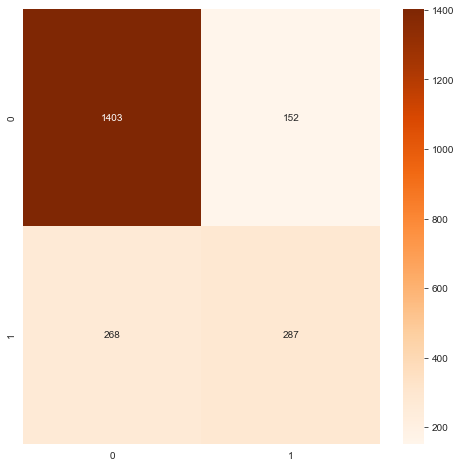

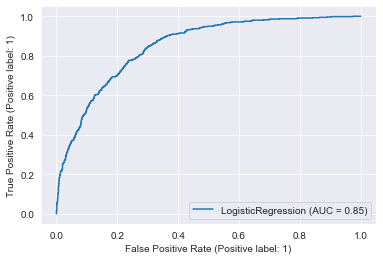

****** K Nearest Neighbor classifier  ******

 ROC_AUC_SCORE :  0.6923264100112975
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1555
           1       0.56      0.54      0.55       555

    accuracy                           0.77      2110
   macro avg       0.70      0.69      0.69      2110
weighted avg       0.76      0.77      0.77      2110

Precision:  0.559322033898305
Recall:  0.5351351351351351
F1 score:  0.5469613259668508


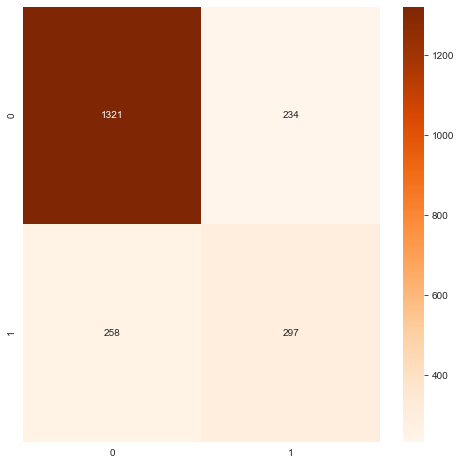

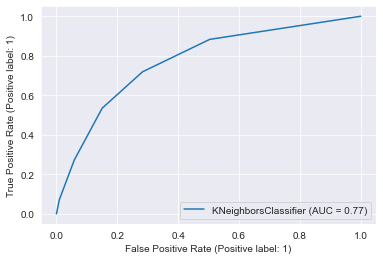

****** Support Vector classifier  ******

 ROC_AUC_SCORE :  0.6943657483850411
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1555
           1       0.66      0.48      0.55       555

    accuracy                           0.80      2110
   macro avg       0.74      0.69      0.71      2110
weighted avg       0.78      0.80      0.79      2110

Precision:  0.6575682382133995
Recall:  0.4774774774774775
F1 score:  0.5532359081419623


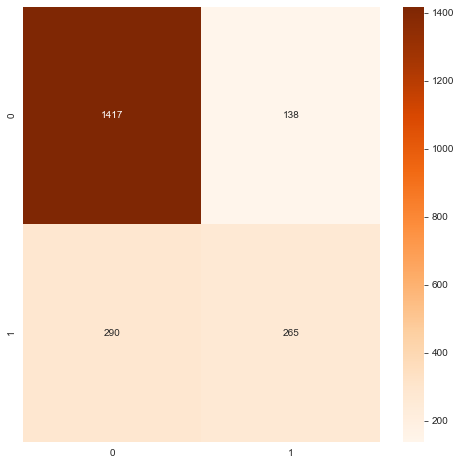

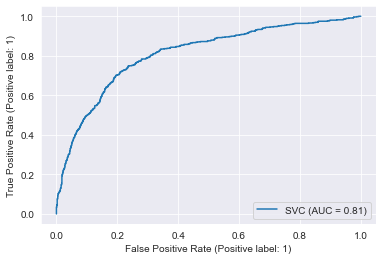

****** Decision Tree classifier  ******

 ROC_AUC_SCORE :  0.6498681961704469
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1555
           1       0.48      0.49      0.48       555

    accuracy                           0.73      2110
   macro avg       0.65      0.65      0.65      2110
weighted avg       0.73      0.73      0.73      2110

Precision:  0.4788732394366197
Recall:  0.4900900900900901
F1 score:  0.4844167408726625


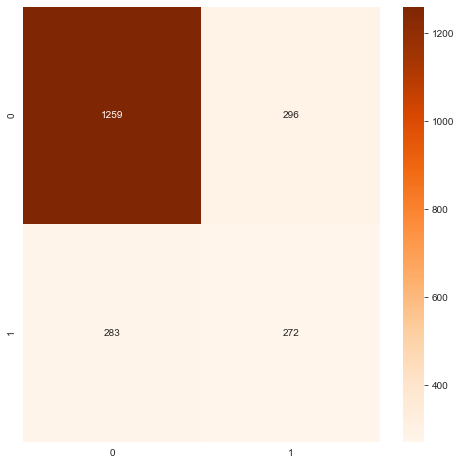

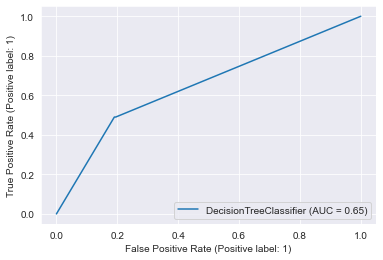

****** Random forest classifier  ******

 ROC_AUC_SCORE :  0.6793777700530113
              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1555
           1       0.61      0.46      0.53       555

    accuracy                           0.78      2110
   macro avg       0.72      0.68      0.69      2110
weighted avg       0.77      0.78      0.77      2110

Precision:  0.6099290780141844
Recall:  0.4648648648648649
F1 score:  0.5276073619631902


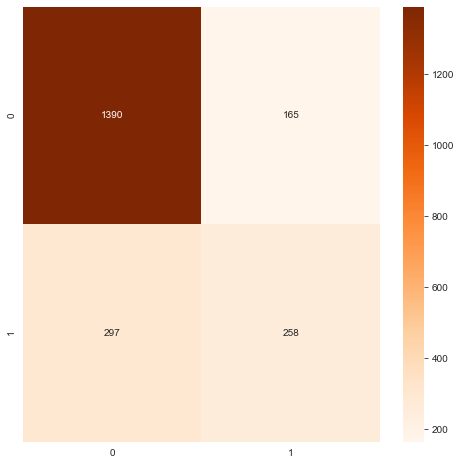

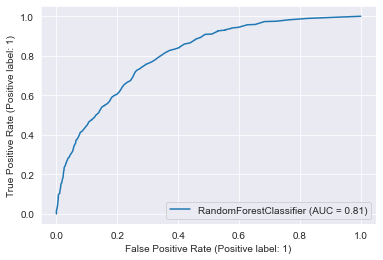

****** AdaBoost classifier ******

 ROC_AUC_SCORE :  0.7103965702036441
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1555
           1       0.63      0.53      0.58       555

    accuracy                           0.79      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.79      0.79      2110

Precision:  0.6284501061571125
Recall:  0.5333333333333333
F1 score:  0.5769980506822612


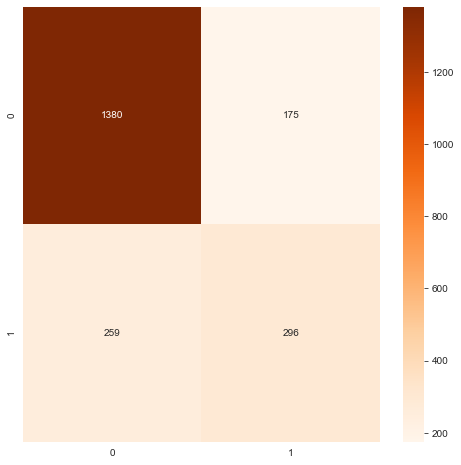

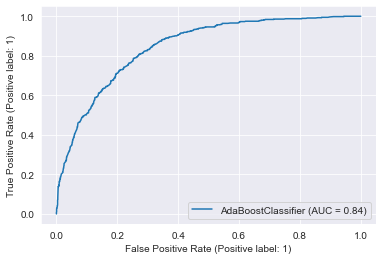

****** Gradient Boosting classifier  ******

 ROC_AUC_SCORE :  0.7076243446018365
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1555
           1       0.65      0.51      0.57       555

    accuracy                           0.80      2110
   macro avg       0.75      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110

Precision:  0.6543778801843319
Recall:  0.5117117117117117
F1 score:  0.5743174924165824


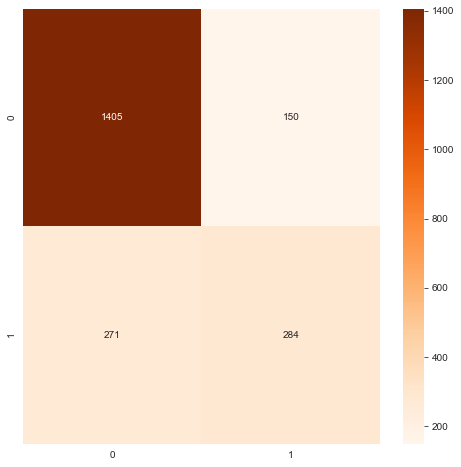

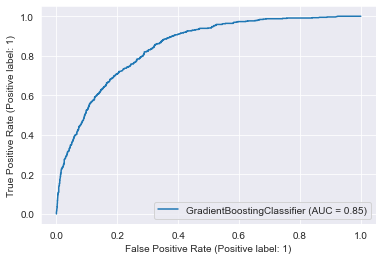

****** Naive Bayes classifier ******

 ROC_AUC_SCORE :  0.7189652675183222
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1555
           1       0.59      0.58      0.59       555

    accuracy                           0.78      2110
   macro avg       0.72      0.72      0.72      2110
weighted avg       0.78      0.78      0.78      2110

Precision:  0.5904936014625228
Recall:  0.581981981981982
F1 score:  0.5862068965517242


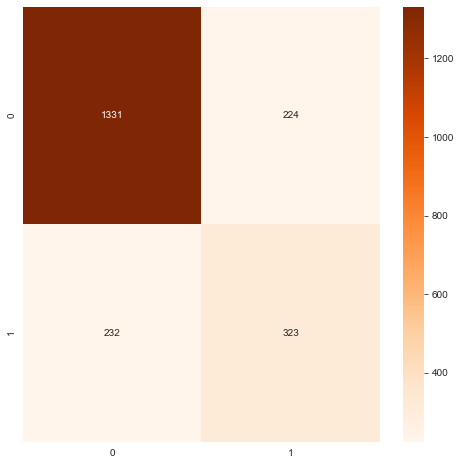

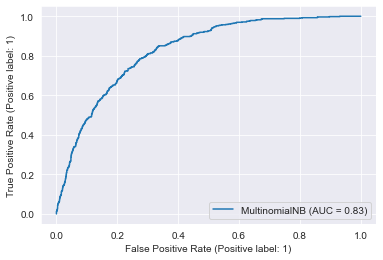

In [111]:
# checking different metrics for evaluation
precision_ =[]
recall_ = []
f1score = []
rocauc = []
for name,model in models:
    print("******",name,"******")
    
    fpr,tpr,thresholds=roc_curve(ytest,model.predict(x_test))
    roc_auc= auc(fpr,tpr)
    print("\n","ROC_AUC_SCORE : ",roc_auc)
    rocauc.append(roc_auc)
    print(classification_report(ytest,model.predict(x_test)))
    precision = precision_score(ytest, model.predict(x_test))
    print('Precision: ', precision)
    precision_.append(precision)
    recall = recall_score(ytest, model.predict(x_test))
    print('Recall: ', recall)
    recall_.append(recall)
    f1 = f1_score(ytest, model.predict(x_test))
    print('F1 score: ', f1)
    f1score.append(f1)
    plt.figure(figsize=(8,8))
    cm = confusion_matrix(ytest,model.predict(x_test))
    sns.heatmap(cm,annot=True,fmt='d',cmap='Oranges')
    plot_roc_curve(model,x_test,ytest)
    plt.show()

In [112]:
# checking cross validation score
crossval=[]
for name,model in models:
    print("******",name,"******")
    cv_= cross_val_score(model,x,y,cv=5).mean()
    print(cv_)
    crossval.append(cv_)

****** Logistic Regression  ******
0.8058872473640737
****** K Nearest Neighbor classifier  ******
0.767917979701169
****** Support Vector classifier  ******
0.7974961607326101
****** Decision Tree classifier  ******
0.7221257055506859
****** Random forest classifier  ******
0.7873988116721817
****** AdaBoost classifier ******
0.8036104783944534
****** Gradient Boosting classifier  ******
0.8028996452405721
****** Naive Bayes classifier ******
0.7747418162186427


In [113]:
# creating a data frame for evaluation
evaluate = pd.DataFrame({})
evaluate['Model'] = Model
evaluate['Train score'] = train_scores
evaluate['Test score'] = test_scores
evaluate['Precision'] = precision_
evaluate['Recall'] = recall_
evaluate['F1 score'] = f1score
evaluate['Roc-Auc score'] = rocauc
evaluate['Cross val score'] = crossval

evaluate

,Model,Train score,Test score,Precision,Recall,F1 score,Roc-Auc score,Cross val score
0,Logistic Regression,0.808411,0.800948,0.653759,0.517117,0.577465,0.709684,0.805887
1,K Nearest Neighbor classifier,0.841325,0.766825,0.559322,0.535135,0.546961,0.692326,0.767918
2,Support Vector classifier,0.824258,0.797156,0.657568,0.477477,0.553236,0.694366,0.797496
3,Decision Tree classifier,0.997359,0.725592,0.478873,0.490090,0.484417,0.649868,0.722126
4,Random forest classifier,0.997359,0.781043,0.609929,0.464865,0.527607,0.679378,0.787399
5,AdaBoost classifier,0.814303,0.794313,0.628450,0.533333,0.576998,0.710397,0.803610
6,Gradient Boosting classifier,0.829134,0.800474,0.654378,0.511712,0.574317,0.707624,0.802900
7,Naive Bayes classifier,0.780577,0.783886,0.590494,0.581982,0.586207,0.718965,0.774742


Will be selecting Gradient boost as the best model although it's performance is similar to Logistic regression as both are performing best but as per the confusion matrix Gradient boost is having less type1 and type2 error as compared to logistic regression

### Hyperparameter Tuning

In [119]:
param = {'learning_rate':[0.01,0.05,0.1],
         'max_depth':np.arange(2,12),
         'max_features':['auto', 'sqrt', 'log2'],
         'n_estimators':np.arange(50,200,50),
         'min_samples_leaf':np.arange(30,71,10),
        }

random_search=RandomizedSearchCV(GB,param,n_jobs=-1,cv=5,verbose=5)
random_search.fit(x_train,ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': array([30, 40, 50, 60, 70]),
                                        'n_estimators': array([ 50, 100, 150])},
                   verbose=5)

In [120]:
# best parameters after grid search
random_search.best_params_

{'n_estimators': 150,
 'min_samples_leaf': 70,
 'max_features': 'sqrt',
 'max_depth': 8,
 'learning_rate': 0.05}

In [122]:
# tuning the model
tuned_model = GradientBoostingClassifier(n_estimators=150,max_features='sqrt',max_depth=8,
                                        learning_rate=0.05,min_samples_leaf=70)
tuned_model.fit(x_train,ytrain)
tuned_pred = tuned_model.predict(x_test)
print(accuracy_score(ytest,tuned_pred))

0.7933649289099526


In [123]:
# checking cross val score
cross_val_score(tuned_model,x,y,cv=5).mean()

0.8023307562977633

<AxesSubplot:>

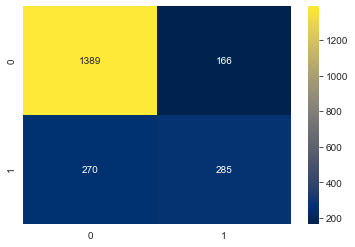

In [124]:
#checking confusion matrix
sns.heatmap(confusion_matrix(ytest,tuned_pred),cmap='cividis',annot=True,fmt='d')

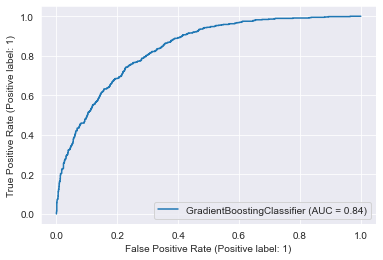

In [125]:
# checking auc score
plot_roc_curve(tuned_model,x_test,ytest)

In [126]:
# checking classification report
print(classification_report(ytest,tuned_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1555
           1       0.63      0.51      0.57       555

    accuracy                           0.79      2110
   macro avg       0.73      0.70      0.72      2110
weighted avg       0.78      0.79      0.79      2110



The default gradient Boost model is working better than the tuned model all the score are getting lowered by 0.01 so will keeping gradiant boost with default parametres as final model for this problem statement.

### Saving the model

In [82]:
final_model = GradientBoostingClassifier()

In [83]:
import joblib
joblib.dump(final_model,'Customer_Churn .pkl')

['Customer_Churn .pkl']